# Numpy
Numpy ist ein populäres Python-Paket für numerische Berechnungen. Die wesentliche Datenstruktur ist das *Array*. Im Gegensatz zu Python-Listen sind alle Elemente eines Arrays vom selben Typ (normalerweise: Gleitkomma-Zahlen), und arithmetische Operationen sind so definiert, wie man das aus der Mathematik erwarten würde (im Gegensatz zu Python-Listen).

Arrays können beispielsweise so erzeugt werden:

In [2]:
import numpy as np
zz = np.zeros(10000)
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
b = np.arange(10)

*Aufgabe*: Erstellen Sie eine Sequenz von Zahlen mit np.arange() mit Start 0 und bis (exklusive) 6, mit Schrittlänge 1.

Eine ähnliche Methode zur Erzeugung von Arrays ist numpy.linspace(). 

*Aufgabe*: Erstellen Sie eine Sequenz von Zahlen mit np.linspace(), mit Start 0 und bis (exklusive) 0.6, mit Schrittlänge 0.1.

## Sinus-Funktionen
Numpy kann auch verwendet werden, um interessantere Signale zu erstellen, beispielsweise eine Sinus-Welle. Die Funktion folgt der Gleichung $y(t) = A\sin(\omega t)$ mit $\omega = 2\pi f$, wobei $f$ die Frequenz ist, $A$ die maximale Amplitude und $t$ die Zeit. 

Die interessante Eigenschaft vieler Numpy-Funktionen ist die Tatsache, dass diese direkt auf Arrays arbeiten. Das bedeutet, die Eingabe der Funktion np.sin() kann ein Array sein, die Funktion berechnet dann den Sinus an jeder Stelle des Arrays. 

Das ist ganz generell die Funktionsweise von Numpy: Alle Funktionen und arithmetischen Operationen arbeiten direkt auf Arrays. Bespielsweise entspricht die Multiplikation eines Skalars mit einem Array der Skalar-Vektor-Multiplikation, d.h. jedes Element des Arrays wird mit dem Skalar multipliziert.

*Aufgabe*: Erstellen Sie eine Sinus-Welle mit einer Frequenz von 2Hz, einer Dauer von 1s, einer Amplitude von 0.3 und einer Sampling-Frequenz von 44.1Hz.

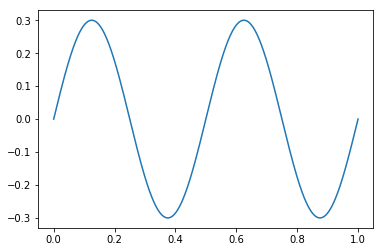

In [13]:
dur = 1  # duration in seconds
amp = 0.3  # maximum amplitude
freq = 2  # frequency of the sine tone in Hertz
fs = 44100  # sampling frequency in Hertz


t = np.linspace(0,1,44100)
y = amp * np.sin(t*2*freq*np.pi)
import matplotlib.pyplot as plt
plt.plot(t,y)

# Signalverarbeitung
## Diskrete Faltung
Siehe https://en.wikipedia.org/wiki/Convolution

Die Faltung kann benutzt werden, um Signale zu filten. Betrachten wir folgende Signale (Filter-Kernel):

In [3]:
import numpy as np
from scipy.stats import norm
low = 0.3 * norm.pdf(np.arange(-0.5,0.6,0.1))
high = -norm.pdf(np.arange(1,20),loc=10,scale=10)
high[10] = 0.9
diff = np.array([-1,1])

Schauen wir uns die Kernel einmal an.

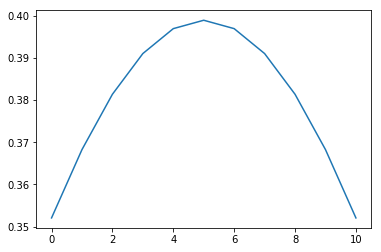

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(low)


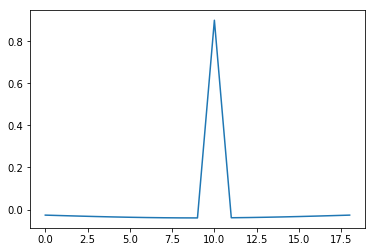

In [7]:
plt.plot(high)

### Aufgabe
Filtern Sie folgende Signale mit Hoch- Tief- und Bandpassfiltern und erklären Sie das Ergebnis. Nutzen Sie die Funktion `np.signal.convolve`

In [5]:
from scipy import signal
import pandas as pd

sig=np.sin(np.arange(0,3.14,0.01)*15 * np.pi)+2*np.sin(np.arange(0,3.14,0.01) * np.pi)
square = np.repeat(np.array([0,1,0]),np.array([5,10,5]))

## Diskrete Fourier-Transformation
* Idee: Stelle Signal mit neuer Basis dar
* Nutze als Basis Sinus- und Cosinusfunktionen
* Basistransformation = Matrixmultiplikation

### Aufgabe
* Erstellen Sie die Basis-Transformations-Matrix für das unten angegebene Signal
* Berechnen Sie die DFT dieses Signals
* Stellen Sie Betrag und Phase des Ergebnisses dar
* Berechnen Sie die DFT des hoch- und tiefpass-gefilterten Signals, und erklären Sie das Ergebnis